# First Session of Stochastic Modelling
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guglielmopadula/StochasticModelling2022-2023/blob/main/FirstSession.ipynb)

## Part 1: A very fast recap of Probability

From Wikipedia:

The **probability** of an event is a number that indicates how likely the event is to occur.

### Basic rules of probability:

$$P(A\cup B)+P(A\cap B)=P(A)+P(B) \quad \forall A,B \in \Omega$$

$$0 \le P(A)\le 1 \quad \forall A \in \Omega$$ 

$$P(A|B)P(B)=P(A\cap B) \quad \forall A,B \in \Omega$$ (Bayes law)

$$P(A)=P(A|B)P(B)+P(A|B^{C})P(B^{C}) \quad \forall A,B \in \Omega$$ (law of total probability)

$$P(B^{C})=1-P(B) \quad \forall B\in \Omega$$

If $A$ and $B$ are independent we have $$P(A \cap B)= P(A)P(B) \quad \forall A,B \in \Omega$$

### A realistic exercise

Let's do a very basic exercise (which I actually did in the last year):

It is known from the academic year 2020-2021 that a student who does his Stochastic Modelling homeworks has a chance of 90 percent to get a very good grade (between $27$ and $30$); but the chance drops to 75 percent if he doesn't do the homeworks.
Guglielmo has been very busy with other courses and figures that he has only a 69 percent chance of doing the homeworks.
What are his chance of not getting a very good grade in the course?

Answer:
There are two important events under discussion. Let us name them.

$E$ : doing homeworks.

$F$ : getting a very good grade.

We know that $$P(F|E)=0.9$$, $$P(F|E^{C})=0.75$$ and $$P(E)=0.69$$

The solution is to use the ..... you tell me, question time!!!

## Part 2: A very fast recap of Random Variables

- A random variable is function $$X: \Omega \rightarrow \mathbb{R}$$ 
- A random variable is characterized by it's cumulative density function $F(x)=P(X\le x)$.
- A discrete random variable has a countable support and it is characterized by $P(X=x)=F(x)-F(X=\max_{y\in X|F(y)< F(x)} y)$.
- A continous random variable has a noncountable support and is characterized by $f(x)=\frac{dF}{dx}$

The most important properties of a random variable are the moments
- non central moments: $E[X^{k}]=\int_{Im(X)}y^{k}f(y)dy$ if the variable is continuous or $E[X^{k}]=\sum_{y \in Im(x)}y^{k}f(y)$ if the variable is discrete
- central moments: $E[(X-E[X])^{k}]=\int_{Im(X)}(y-E[X])^{k}f(y)dy$ if the variable is continuous or $E[X^{k}]=\sum_{y \in Im(x)}(y-E[X])^{k}f(y)$ if the variable is discrete

Examples of r.v:
- continuous: Gaussian, Exponential, Beta, UniformContinous
- discrete: Bernoulli, Binomial, Poisson


Properties of mean and variance:
$$E[aX+bY]=aE[X]+bE[Y]$$
$$Var[aX]=a^{2}Var[X]$$
$$Var[X+Y]=Var[X]+Var[Y]+2Cov(X,Y)$$

Some random variables are identically distributed if they have the same cdf/pdf.
There are two very important theorems in probability. Let's assume that we have a set of i.i.d  random variables $X_{i}$ with finite mean and variance, then:
- Central limit theorem: $$\frac{\sum\limits_{i=1}^{n} X_{i}-nE[X]}{\sqrt{nVar[X]}}\rightarrow Normal(0,1)$$
- Law of large numbers: $$\frac{\sum\limits_{i=1}^{n} X_{i}}{n}\rightarrow E[X]$$

## A coin tossing
Let's suppose we want to see if a coin is balanced. We may use random variables. We may toss a coin a lot of times and assign to a random variable the value 1 is we get head and the value 0 if we get tail. So we get a binary variable, which is usually called Bernoulli random variable. 
$$X=\begin{cases} 1 \text{ with probability } p \\
0 \text{ with probability } 1-p \end{cases}$$

An important property of a Bernoulli random variable is that $E[X]=0*(1-p)+1*p=p$

Our coin is balanced if and only if we have $p=0.5$.

As tossing a coin is slow (and I only have one hour) we are going to simulate the tosses using scipy.

In [7]:
!pip install numpy matplotlib scipy dill
from scipy.stats import bernoulli #basic python importing
from tqdm import trange #Very useful function that you probably don't know
class TossingMachine():
    def __init__(self):
        self.p=0.5
        self.dist=bernoulli
    
    def toss(self):
        a=self.dist.rvs(self.p)
        if a==1:
            return "Head"
        else:
            return "Tail"

tossing_machine=TossingMachine()
print(tossing_machine.toss())


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Tail


To see if our virtual coin is balanced or not we may toss a lot of times and then calculate the sample avarage. 
The sample average will approximate our probability $p$ because of the law of large numbers.


In [2]:
X=[] #inizialization of the list
for i in trange(100000):
    tmp=tossing_machine.toss()
    if tmp=="Head":
        X.append(1)
    else:
        X.append(0)

print(sum(X)/100000)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:02<00:00, 40516.62it/s]

0.5005


We got a value near $0.5$. So we are happy :-) .

## The queen of all r.v: the Gaussian R.V. 
### but republic is approaching ....


The Gaussian distribution is characterized by it's mean $\mu$ and it's variance $\sigma^{2}$.
It has the following pdf
$$
f(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-(\frac{x-\mu}{\sigma})^{2}}$$
The parameter $\sigma$ is called standard deviation. 
The Gaussian distribution is particulary important because of the following two properties:
- it is the limit distribution of the central limit theorem
- it is the only distribution with finite variance such that all linear combinations of **independent** random variables from it's distribution have it's distribution:
$$ X_{i}\sim N(\mu_{i},\sigma_{i}^{2})$$ 
$$\sum_{i=1}^{n} a_{i}X_{i}\sim N(\sum\limits_{i=1}^{n} a_{i}\mu_{i},\sum\limits_{i=1}^{n} a_{i}^{2}\sigma_{i}^{2})$$
This two properties are strongly linked with each other, for a proof of this I invite to follow the course of Information Theory.

Let's now look at scipy stats function.


In [3]:
from scipy.stats import norm #normal random variable
distribution=norm(1,4) #mean=1, standard deviation=1,not variance!!!
print("P(X<=0) is, ",distribution.cdf(0))
print("Variance of X is", distribution.var())
print("Mean of X is", distribution.mean())
print("f(0) is",distribution.pdf(0))
print("Sampling from Normal is", distribution.rvs())

P(X<=0) is,  0.4012936743170763
Variance of X is 16.0
Mean of X is 1.0
f(0) is 0.09666702920071232
Sampling from Normal is -1.5705329900003977


Time for another question!!!

### Histogram and Kernel Density Estimation

Suppose that you have a blackbox random variable from which you can sample and you want to estimate it's pdf.

You could start by plotting the histogram. To plot an histogram we need to choose a number of bins:
- with a small number of bins there is a very low resolution
- with a high number of bins there is a lot of variance

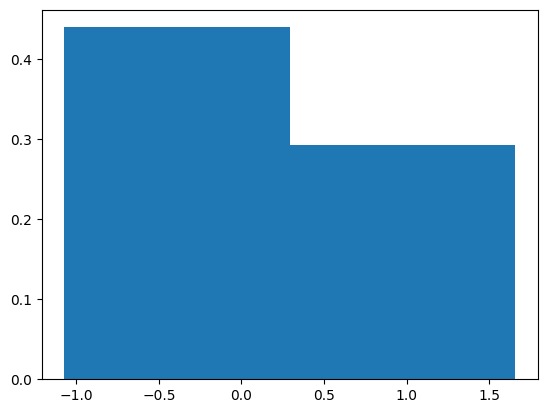

In [37]:
import dill
import scipy
import matplotlib.pyplot as plt
blackboxrv=dill.load(open( "blackbox.p", "rb" ))
dataset=blackboxrv.sample(50000)
a=plt.hist(dataset,density=True,bins=2)

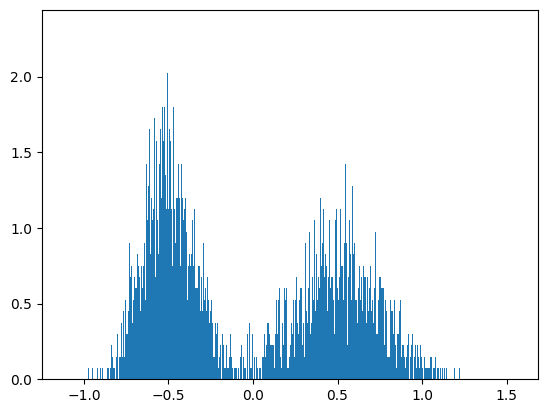

In [40]:
dataset=blackboxrv.sample(50000)
a=plt.hist(dataset,density=True,bins=10000)

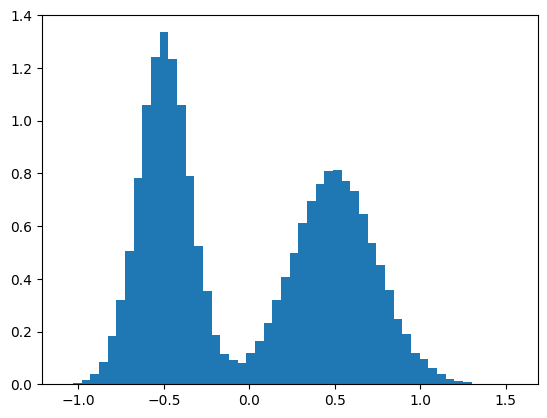

In [52]:
dataset=blackboxrv.sample(50000)
a=plt.hist(dataset,density=True,bins="scott") #use scott optimal binning

The random variable is clearly bimodal. Let's try to estimate the pdf using a KDE estimation, which basically interpolates using a lot of gaussian distributions using kernels (for details in this technique see the Unsupervised Learning course).

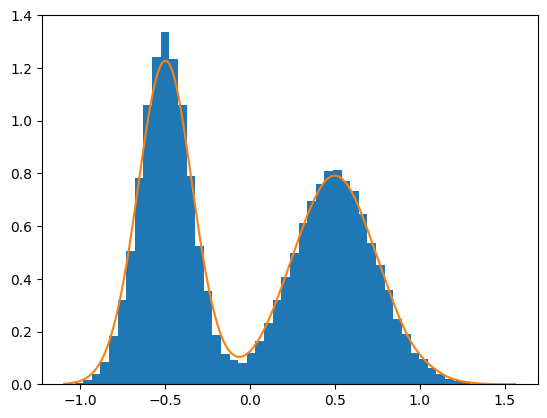

In [53]:
import numpy as np
epsilon=0.01
kde=scipy.stats.gaussian_kde(dataset)
a=plt.hist(dataset,density=True,bins="scott")
x=np.min(dataset)-epsilon+(np.max(dataset)-np.min(dataset)+2*epsilon)*np.arange(1000)/1000
b=plt.plot(x,kde.pdf(x))

The KDE estimate is good.

One last question ..